# Implementing Tester

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import time
import random
import datetime
from datetime import date
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import pickle
import os
os.chdir('../')

import pandas_bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
pandas_bokeh.output_notebook()

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.efficient_frontier import EfficientCVaR,EfficientCDaR
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices
from pypfopt import objective_functions

from pyomo.environ import *
from pyomo.opt import SolverFactory

from src.test_pipeline import test_pipeline
from src.test_pipeline import test_rolling
from src.test_pipeline import random_test
from src.test_pipeline import Hierarchical_Computing

plt.rcParams["figure.figsize"] = (18,5)

Loading BokehJS ...

In [9]:
complete_df = pd.read_csv("data/complete_df.csv")
betas = pd.read_csv("data/betas.csv")

In [4]:
from src.risk_methods_pyportfolio import obtain_betas_risklevel

betas, risk_level = obtain_betas_risklevel(train)

d:\Documentos\Universidad\Cuarto\Big data Project\Git\IronIA-RoboAdvisor\src\risk_methods_pyportfolio.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_betas['value_product'] = filtered_betas['value_product'].apply(lambda x: round(x,3))


In [11]:
complete_df.loc[complete_df.names=='MAN AHL MULTI STRATEG "DN" (USD)']

,fund_indx,names,benchmark_id,risk_level
93,255746,"MAN AHL MULTI STRATEG ""DN"" (USD)",5887a12ec11e3870353bca5e,3


In [3]:
train = pd.read_csv("data/prices_train.csv")
train.set_index("Unnamed: 0",inplace=True)
train.index.name= 'date'
test = pd.read_csv("data/prices_test.csv")
test.set_index("Unnamed: 0",inplace=True)
test.index.name= 'date'

with open('data/different_funds_7.pkl', 'rb') as f: #Cleaning duplicated name funds
    DifferentNameFunds = pickle.load(f)
    
train = train[DifferentNameFunds]
test = test[DifferentNameFunds]


In [3]:
train_risk_1 = pd.read_csv("data/Risk Dataframes/train_1_risk.csv")
train_risk_1.set_index("date",inplace=True)
train_risk_1 = train_risk_1.reindex(columns=DifferentNameFunds)
train_risk_1.dropna(axis=1,inplace=True)

train_risk_2 = pd.read_csv("data/Risk Dataframes/train_2_risk.csv")
train_risk_2.set_index("date",inplace=True)
train_risk_2 = train_risk_2.reindex(columns=DifferentNameFunds)
train_risk_2.dropna(axis=1,inplace=True)

train_risk_3 = pd.read_csv("data/Risk Dataframes/train_3_risk.csv")
train_risk_3 = train_risk_3.reindex(columns=DifferentNameFunds)
train_risk_3.dropna(axis=1,inplace=True)

train_risk_4 = pd.read_csv("data/Risk Dataframes/train_4_risk.csv")
train_risk_4.set_index("date",inplace=True)
train_risk_4 = train_risk_4.reindex(columns=DifferentNameFunds)
train_risk_4.dropna(axis=1,inplace=True)

train_risk_5 = pd.read_csv("data/Risk Dataframes/train_5_risk.csv")
train_risk_5.set_index("date",inplace=True)
train_risk_5 = train_risk_5.reindex(columns=DifferentNameFunds)
train_risk_5.dropna(axis=1,inplace=True)


In [4]:
weights = test_pipeline(train,test,market_neutral=True,samples=500,min_weight=0.05,add_leftovers=False,method="CVaR",risk=0.05,risk_level=5,budget=1300,gamma=0.1,rs=40,solver='CPLEX') #Methods = CDaR, CVaR, sharpe, MAD, ML

Using CVaR method
Using pypfopt...


d:\Documentos\Universidad\Cuarto\Big data Project\Git\IronIA-RoboAdvisor\src\risk_methods_pyportfolio.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_betas['value_product'] = filtered_betas['value_product'].apply(lambda x: round(x,3))


Expected annual return: 15.8%
Conditional Value at Risk: 5.00%
Optimization time: 1.668436050415039 seconds
Budget not inverted: 197.42$
Volatility obtained in test: 0.14578458042806441
Total return obtained in the test year: 20.29%
Money obtained during test year: 263.82$
Distributed in 4 funds:
{'JPM BRAZIL EQUITY "D" (USD) ACC': 0.38627, 'INVESTEC LATAM SMALLER COMP "A" USD)': 0.34803, 'SEILERN WORLD GROWTH "UI" (USD)': 0.06157, 'JPM EMG MKTS SMALL CAP "A PERF" (GBP)INC': 0.05227}


In [ ]:
import random

N_ = random.randint(5,20)
train_random = train.sample(n=N_,axis=1)
test_ = test.pct_change().dropna()

def rd(n, total_sum):
    nums = np.random.rand(n)
    return nums/np.sum(nums)*total_sum

random_weights = rd(N_,1)

random_weights_dict = {}

for i,j in enumerate(train_random.columns):
    random_weights_dict[j] = random_weights[i]

choosen_funds_df = test_[random_weights_dict.keys()].copy()
pass

_ = test_rolling(random_weights_dict,test_,verbose=True)

Volatility obtained in test: 0.06387419173824242
Total return obtained in the test year: 14.91%
Money obtained during test year: 0.15$
Distributed in 13 funds:
{'SCHRODER ISF ASIAN TOT RET "C" (EURHDG)': 0.18524836765394667, 'SCHRODER ISF GLB RECOVERY "C" (GBPHDG)': 0.11774313657738292, 'NORDEA 1 DANISH COVER "BC" (EUR)': 0.10312001355079295, 'BARINGS EASTERN EUROP "A" (USD)': 0.09909836336564862, 'VAUGHAN NELSON US SEL EQ"H-I"(EURHDG)ACC': 0.09379319240264343, 'AXA IM FIIS EUR SHORT DUR HY "E"(USDHDG)': 0.07995906405191462, 'JPM AMERICA EQUITY "A" (EUR HDG)': 0.079942798710728, 'BANKIA SMALL & MID CAPS ESPANA, FI': 0.07320528583458209, 'GENERALI ABSOLUTE RET MULTI STRATS "C"': 0.07160599743675573, 'M INVEST SOL - SEXTANT GLOBAL "A" (EUR)': 0.03437430992134415, 'ATL CAPITAL LIQUIDEZ FI': 0.02384720411938271, 'ODEY PAN EUROPEAN "R" (EUR) ACC': 0.01979552375119765, 'OLEA NEUTRAL FI (EUR) ACC': 0.018266742623680565}


### First results with random subsamples

In [ ]:
first_results_df = pd.read_csv("data/First approach results.csv")
first_results_df.replace('-', 0,inplace=True)

In [ ]:
first_results_df

,Method,Expected annual return %,Number of funds,Test return %,Variance
0,Random_di1,0,1,13.94,104.99
1,Random_di30,0,30,13.59,4.22
2,CVaR_r0.5,8.3,25,18.87,0
3,CVaR_r5,10.5,20,20.21,0
4,CVaR_r30,12,19,20.98,0
5,CVaR_r50,12.4,19,21.52,0
6,CDaR_r0.5,8.1,28,19.59,0
7,CDaR_r5,10.2,21,20.10,0
8,CDaR_r30,11.9,19,21.00,0
9,CDaR_r50,12.3,20,21.45,0


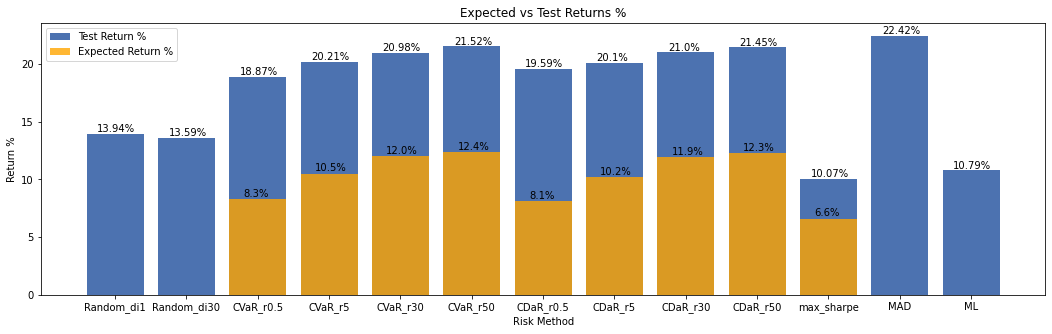

In [ ]:
labels = first_results_df["Method"].values
expected_return = first_results_df["Expected annual return %"].values
for i,j in enumerate(expected_return):
    expected_return[i] = float(j)

test_return = first_results_df["Test return %"].values

plt.bar(labels,test_return,label="Test Return %")

for index, value in enumerate(test_return):
    plt.text(index-0.25, value+0.15, str(value)+"%")

plt.bar(labels,expected_return,label="Expected Return %",color="orange",alpha=0.8)

for index, value in enumerate(expected_return):
    if value != 0:
        plt.text(index-0.2, value+0.2, str(value)+"%")
    
plt.title("Expected vs Test Returns %")
plt.xlabel("Risk Method")
plt.ylabel("Return %")
plt.legend(loc='upper left')



#### Randomly selecting funds and weights 

In [ ]:
train_splitted = pd.read_csv("prices_train.csv").sample(n=500,axis=1,random_state=40)
random_gains1 = random_test(train,test,20000,1,500)
random_gains30 = random_test(train,test,20000,30,500)

500 out of 20000
1000 out of 20000
1500 out of 20000
2000 out of 20000
2500 out of 20000
3000 out of 20000
3500 out of 20000
4000 out of 20000
4500 out of 20000
5000 out of 20000
5500 out of 20000
6000 out of 20000
6500 out of 20000
7000 out of 20000
7500 out of 20000
8000 out of 20000
8500 out of 20000
9000 out of 20000
9500 out of 20000
10000 out of 20000
10500 out of 20000
11000 out of 20000
11500 out of 20000
12000 out of 20000
12500 out of 20000
13000 out of 20000
13500 out of 20000
14000 out of 20000
14500 out of 20000
15000 out of 20000
15500 out of 20000
16000 out of 20000
16500 out of 20000
17000 out of 20000
17500 out of 20000
18000 out of 20000
18500 out of 20000
19000 out of 20000
19500 out of 20000
20000 out of 20000
500 out of 20000
1000 out of 20000
1500 out of 20000
2000 out of 20000
2500 out of 20000
3000 out of 20000
3500 out of 20000
4000 out of 20000
4500 out of 20000
5000 out of 20000
5500 out of 20000
6000 out of 20000
6500 out of 20000
7000 out of 20000
7500 out 

In [ ]:
for i,j in enumerate(random_gains30):
    if j > 35:
        random_gains30[i] = np.mean(random_gains30)

Mean: 13.956856567346772
Variance: 4.024145470122779
Min value: 6.79
Max value: 35.06
95% Quantile: 17.24
75% Quantile: 15.31
25% Quantile: 12.6
5% Quantile: 10.6795


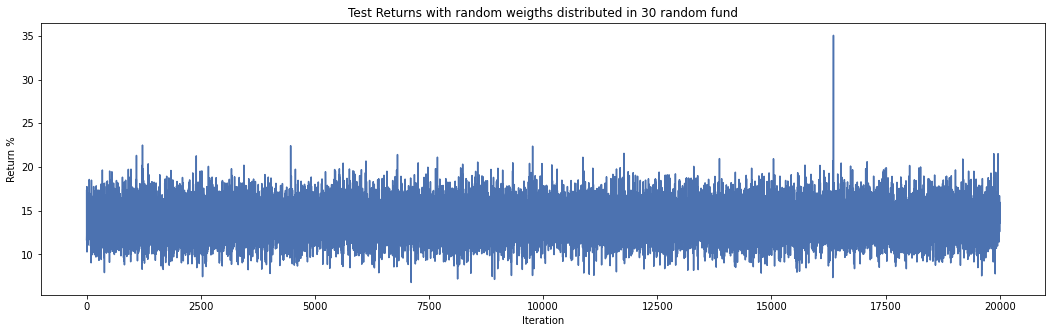

In [ ]:
plt.plot(random_gains30)
print("Mean:",np.mean(random_gains30))
print("Variance:",np.var(random_gains30))
print("Min value:",min(random_gains30))
print("Max value:",max(random_gains30))
plt.title("Test Returns with random weigths distributed in 30 random fund")
plt.xlabel("Iteration")
plt.ylabel("Return %")
print("95% Quantile:",np.quantile(random_gains30, 0.95))
print("75% Quantile:",np.quantile(random_gains30, 0.75))
print("25% Quantile:",np.quantile(random_gains30, 0.25))
print("5% Quantile:",np.quantile(random_gains30, 0.05))
pass

Mean: 13.988455499999999
Variance: 90.30612679951976
Min value: -52.52
Max value: 70.86
95% Quantile: 29.49049999999999
75% Quantile: 21.87
25% Quantile: 6.387499999999999
5% Quantile: 0.54


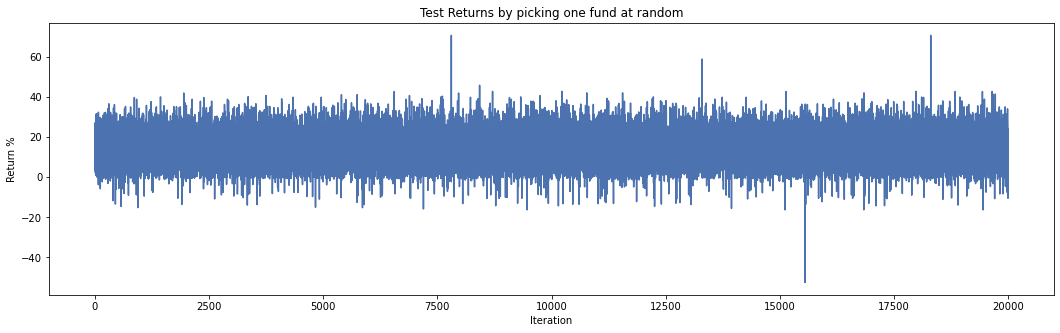

In [ ]:
plt.plot(random_gains1)
print("Mean:",np.mean(random_gains1))
print("Variance:",np.var(random_gains1))
print("Min value:",min(random_gains1))
print("Max value:",max(random_gains1))
plt.title("Test Returns by picking one fund at random")
plt.xlabel("Iteration")
plt.ylabel("Return %")
print("95% Quantile:",np.quantile(random_gains1, 0.95))
print("75% Quantile:",np.quantile(random_gains1, 0.75))
print("25% Quantile:",np.quantile(random_gains1, 0.25))
print("5% Quantile:",np.quantile(random_gains1, 0.05))
pass

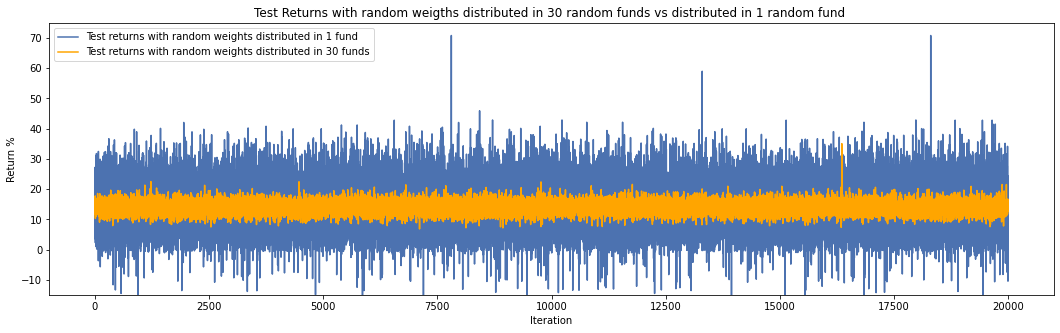

In [ ]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 20000, 20000)
ax.plot(x, random_gains1,label="Test returns with random weights distributed in 1 fund")
plt.ylim(-15, 75)

plt.plot(random_gains30,color="orange",label="Test returns with random weights distributed in 30 funds")
plt.title("Test Returns with random weigths distributed in 30 random funds vs distributed in 1 random fund ")
plt.xlabel("Iteration")
plt.ylabel("Return %")
plt.legend(loc='upper left')

### Herarchical computing

In [31]:
selected_funds = Hierarchical_Computing(train,test,market_neutral=False,n_steps=1,split_size=500,print_every=20,
                                        min_weight=0.001,add_leftovers=False,method="CDaR",risk=0.05,risk_level=4,gamma=0.2,solver='CPLEX')

Iteration 1
-----------
Selected funds in step 1: 137 



In [32]:
weights,returns,info_dict = test_pipeline(train[selected_funds],test,market_neutral=False,
                        min_weight=0.04,add_leftovers=True,samples=0,method="CDaR",
                        risk=0.005,risk_level=4,budget=500,gamma=0.15,rs=40,solver='CPLEX') #Methods = CDaR, CVaR, sharpe, MAD, ML

print("Sum of weights =",sum(weights.values()))

Using CDaR method
Using pypfopt...
Expected annual return: 16.9%
Conditional Drawdown at Risk: 0.50%
Optimization time: 0.6650302410125732 seconds
Budget not inverted: 0.0$
Volatility obtained in test: 0.1278651262669233
Total return obtained in the test year: 23.24%
Money obtained during test year: 116.19$
Distributed in 8 funds:
{'JPM BRAZIL EQUITY "D" (USD) ACC': 0.220615, 'THREADNEEDLE LATIN AMERICA "Z"': 0.166255, 'TEMPLETON LATIN AMERICA "W" (GBP)': 0.13958500000000001, 'T ROWE P US LAR CAP GRW EQ "Q" (GBP)': 0.116025, 'JPM US TECHNOLOGY "D"': 0.110395, 'MERIAN UK SMALLER COM "R" (GBP) D A': 0.09643499999999999, 'HERMES ASIA EX-JAPAN "C" (GBP) D': 0.083425, 'BGF WORLD TECHNOLOGY "D2" (USD)': 0.06725500000000001}


Sum of weights = 0.9999900000000002


#### Results with herarchical computing

In [80]:
first_results_df = pd.read_csv("data/First approach Herarchical.csv")
first_results_df.replace('-', 0,inplace=True)

first_results_df['Volatility %'] = pd.to_numeric(first_results_df['Volatility %'])

In [81]:
first_results_df

,Method,Expected annual return %,Number of funds,Test return %,Volatility %
0,Random_di1,0,1,13.94,90.0
1,Random_di30,0,30,13.59,4.0
2,CVaR_r0.5,19.4,9,28.14,16.0
3,CVaR_r5,20.1,9,28.41,16.6
4,CVaR_r30,22.9,10,26.95,15.4
5,CVaR_r50,23.5,9,21.52,15.2
6,CDaR_r0.5,19,9,26.76,16.1
7,CDaR_r5,20.1,9,28.54,16.6
8,CDaR_r30,22.2,7,30.63,17.8
9,CDaR_r50,22.5,8,30.26,17.0


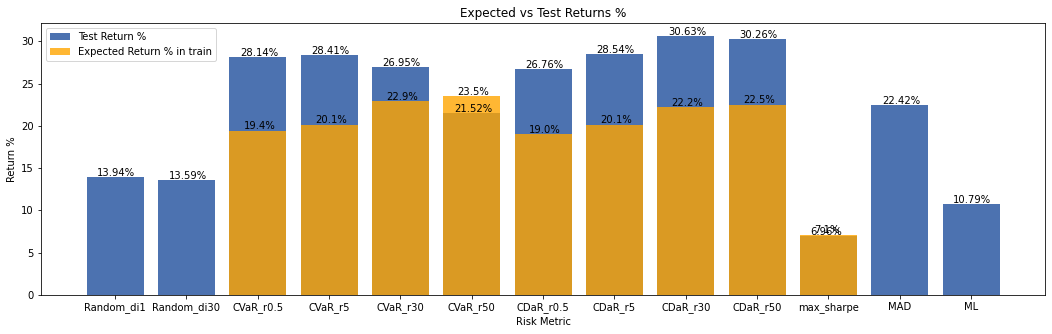

In [109]:
labels = first_results_df["Method"].values
expected_return = first_results_df["Expected annual return %"].values
for i,j in enumerate(expected_return):
    expected_return[i] = float(j)

test_return = first_results_df["Test return %"].values

plt.bar(labels,test_return,label="Test Return %")

for index, value in enumerate(test_return):
    plt.text(index-0.25, value+0.15, str(value)+"%")

plt.bar(labels,expected_return,label="Expected Return % in train",color="orange",alpha=0.8)

for index, value in enumerate(expected_return):
    if value != 0:
        plt.text(index-0.2, value+0.2, str(value)+"%")
    
plt.title("Expected vs Test Returns %")
plt.xlabel("Risk Metric")
plt.ylabel("Return %")
plt.legend(loc='upper left')



Text(0, 0.5, 'Volatility %')

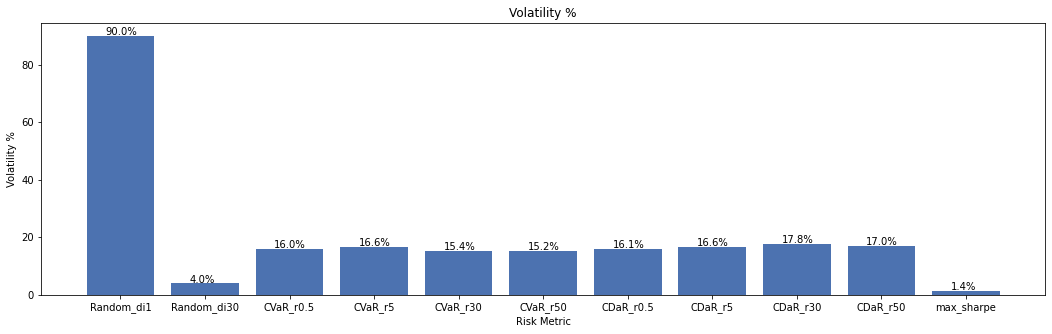

In [88]:
labels = first_results_df["Method"][:-2].values

plt.bar(labels,first_results_df["Volatility %"][:-2],label="Volatility %")

for index, value in enumerate(first_results_df["Volatility %"][:-2]):
    plt.text(index-0.18, value+0.3, str(value)+"%")

plt.title("Volatility %")
plt.xlabel("Risk Metric")
plt.ylabel("Volatility %")


### Final Results

In [51]:
final_results_df = pd.read_csv("data/Final Approach Results.csv")

final_results_df['Volatility %'] = pd.to_numeric(final_results_df['Volatility %'])

In [52]:
final_results_df

,Method,Expected annual return %,Number of funds,Test return %,Volatility %
0,CVaR Stock,17.7,9,26.17,13.69
1,CDaR Stock,16.9,8,23.24,12.78
2,Risk 1 CVaR,9.1,6,9.03,6.19
3,Risk 1 CDaR,7.8,6,10.65,4.86
4,Risk 2 CVaR,13.3,10,12.26,7.20
5,Risk 2 CDaR,12.8,10,12.66,7.47
6,Risk 3 CVaR,15.8,11,16.02,10.11
7,Risk 3 CDaR,15.7,10,18.05,11.11
8,Risk 4 CVaR,17.6,8,26.39,13.73
9,Risk 4 CDaR,16.9,8,23.24,12.78


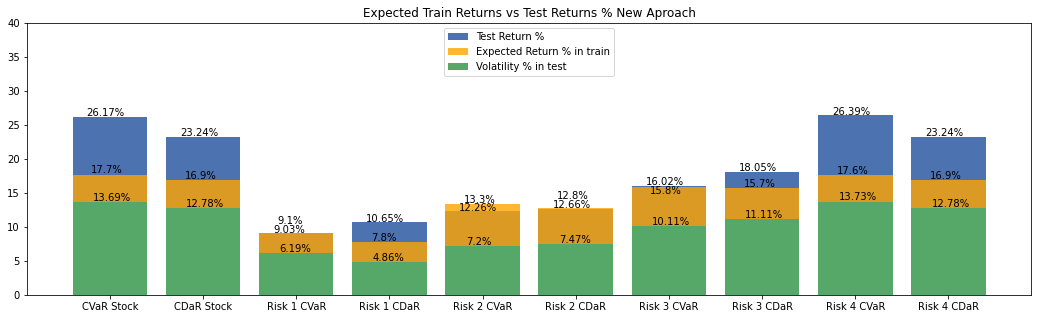

In [123]:
labels = final_results_df["Method"].values
expected_return = final_results_df["Expected annual return %"].values
for i,j in enumerate(expected_return):
    expected_return[i] = float(j)

test_return = final_results_df["Test return %"].values

plt.bar(labels,test_return,label="Test Return %")

for index, value in enumerate(test_return):
    plt.text(index-0.25, value+0.15, str(value)+"%")

plt.bar(labels,expected_return,label="Expected Return % in train",color="orange",alpha=0.8)

for index, value in enumerate(expected_return):
    if index in [2,5]:
        plt.text(index-0.2, value+1.3, str(value)+"%")
    elif index == 6:
        plt.text(index-0.2, value-0.9, str(value)+"%")
    else:
        plt.text(index-0.2, value+0.2, str(value)+"%")


plt.bar(labels,final_results_df["Volatility %"],label="Volatility % in test")

for index, value in enumerate(final_results_df["Volatility %"]):
    plt.text(index-0.18, value+0.2, str(value)+"%")

plt.title("Expected Train Returns vs Test Returns % New Aproach")
plt.legend(loc='upper center')
plt.ylim(0, 40)
pass



Text(0, 0.5, 'Volatility %')

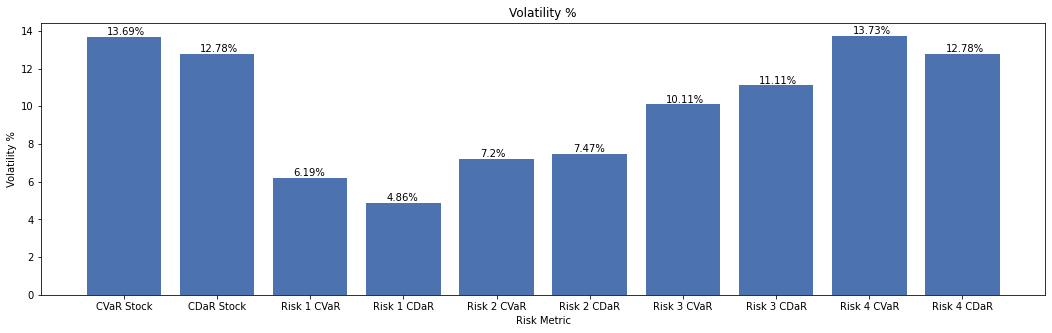

In [54]:
labels = final_results_df["Method"].values

plt.bar(labels,final_results_df["Volatility %"],label="Volatility %")

for index, value in enumerate(final_results_df["Volatility %"]):
    plt.text(index-0.18, value+0.1, str(value)+"%")

plt.title("Volatility %")
plt.xlabel("Risk Metric")
plt.ylabel("Volatility %")

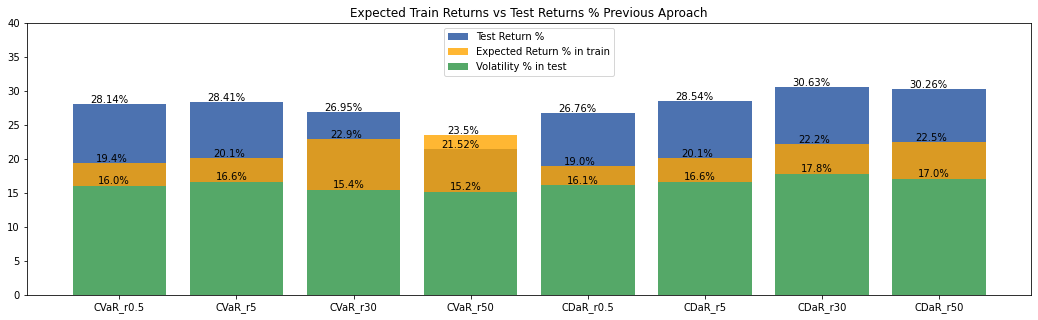

In [124]:
labels = first_results_df["Method"].values[2:-3]
expected_return = first_results_df["Expected annual return %"].values[2:-3]
for i,j in enumerate(expected_return):
    expected_return[i] = float(j)

test_return = first_results_df["Test return %"].values[2:-3]

plt.bar(labels,test_return,label="Test Return %")

for index, value in enumerate(test_return):
    plt.text(index-0.25, value+0.15, str(value)+"%")

plt.bar(labels,expected_return,label="Expected Return % in train",color="orange",alpha=0.8)

for index, value in enumerate(expected_return):
    if value != 0 and index != 10:
        plt.text(index-0.2, value+0.2, str(value)+"%")
    elif value != 0 and index == 10:
        plt.text(index-0.2, value+3.2, str(value)+"%")

volatility = first_results_df["Volatility %"].values[2:-3]


plt.bar(labels,volatility,label="Volatility % in test")

for index, value in enumerate(volatility):
    if value != 0:
        plt.text(index-0.18, value+0.3, str(value)+"%")
    
plt.title("Expected Train Returns vs Test Returns % Previous Aproach")
plt.legend(loc='upper center')
plt.ylim(0, 40)

pass

### Clustering Results

In [125]:
clustering_results_df = pd.read_csv("data/Clustering approach Results.csv")

In [126]:
clustering_results_df

,Method,Expected annual return %,Number of funds,Test return %,Volatility %
0,Risk 1 C0,18.7,6,14.72,4.27
1,Risk 1 C1,9.5,10,4.95,4.68
2,Risk 1 C2,156.9,2,17.10,12.91
3,Risk 1 C3,11.0,7,9.98,5.13
4,Risk 1 C4,32.0,5,8.41,7.52
5,Risk 2 C0,30.0,7,19.48,5.96
6,Risk 2 C1,10.8,9,13.08,5.86
7,Risk 2 C2,313.5,3,18.74,14.00
8,Risk 2 C3,13.4,9,13.91,6.35
9,Risk 2 C4,44.9,8,10.84,7.82


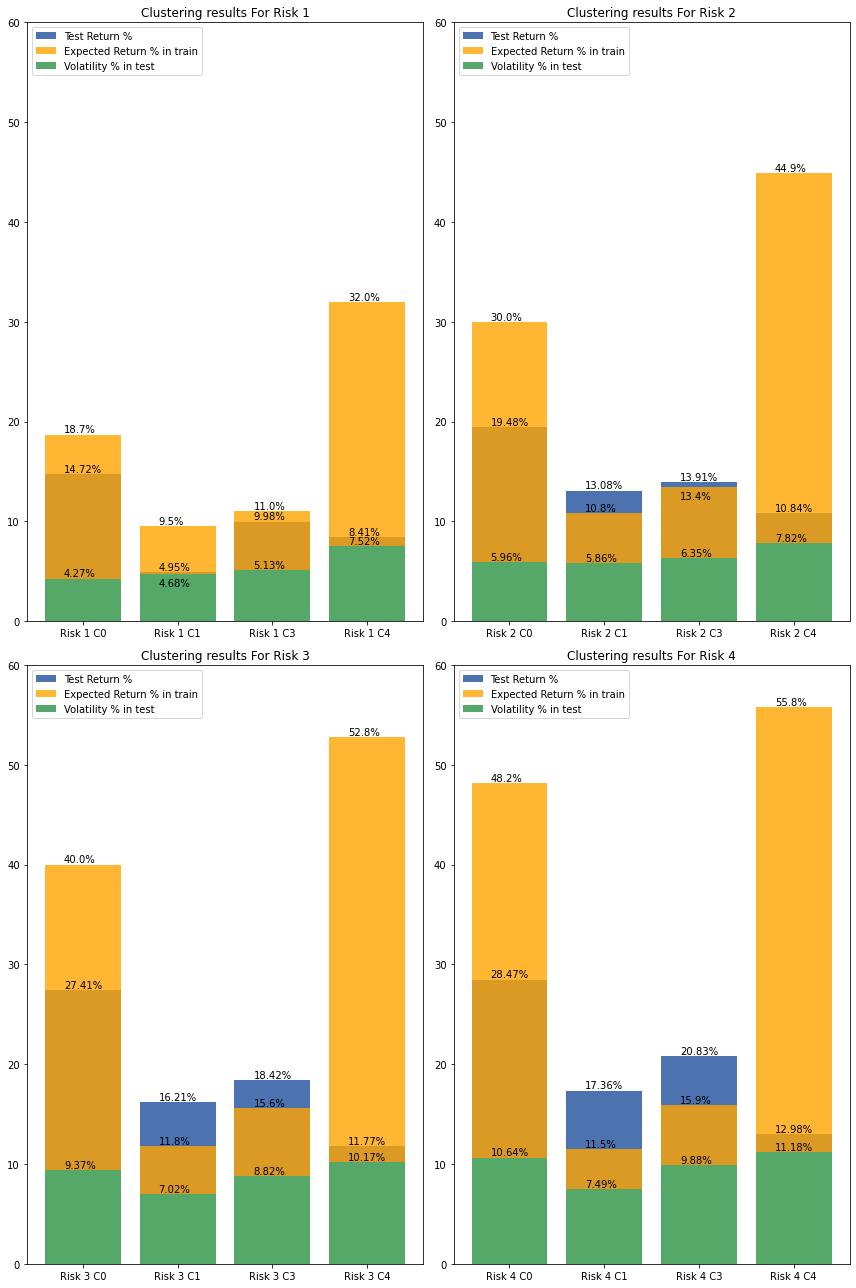

In [180]:
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(12,18))

for risk_number, ax in enumerate(axes.flatten()):

    x = int(0 + risk_number*5)
    y = int(1 + risk_number*5)
    z = int(3 + risk_number*5)
    xz = int(4 + risk_number*5)
    keep = [x,y,z,xz]
    
    labels = clustering_results_df["Method"].values[keep]
    expected_return = clustering_results_df["Expected annual return %"].values[keep]

    for i,j in enumerate(expected_return):
        expected_return[i] = float(j)

    test_return = clustering_results_df["Test return %"].values[keep]

    ax.bar(labels,test_return,label="Test Return %")

    for index, value in enumerate(test_return):
        ax.text(index-0.2, value+0.2, str(value)+"%")

    ax.bar(labels,expected_return,label="Expected Return % in train",color="orange",alpha=0.8)

    for index, value in enumerate(expected_return):
        if risk_number == 1 and index == 2:
            ax.text(index-0.2, value-1.2, str(value)+"%")
        else:
            ax.text(index-0.2, value+0.2, str(value)+"%")



    ax.bar(labels,clustering_results_df["Volatility %"].values[keep],label="Volatility % in test")

    for index, value in enumerate(clustering_results_df["Volatility %"].values[keep]):
        
        if risk_number == 0 and index == 1:
            ax.text(index-0.2, value-1.2, str(value)+"%")

        else:
            ax.text(index-0.2, value+0.2, str(value)+"%")

    ax.set_title(f"Clustering results For Risk {risk_number+1}")

    if risk_number+1 == 1:
        ax.set_ylim([0, 40])
    elif risk_number+1 == 2:
        ax.set_ylim([0, 50])
    elif risk_number+1 == 3:
        ax.set_ylim([0, 60])
    else:
        pass
    
    ax.set_ylim([0, 60])
    ax.legend(loc='upper left')

fig.tight_layout()

pass

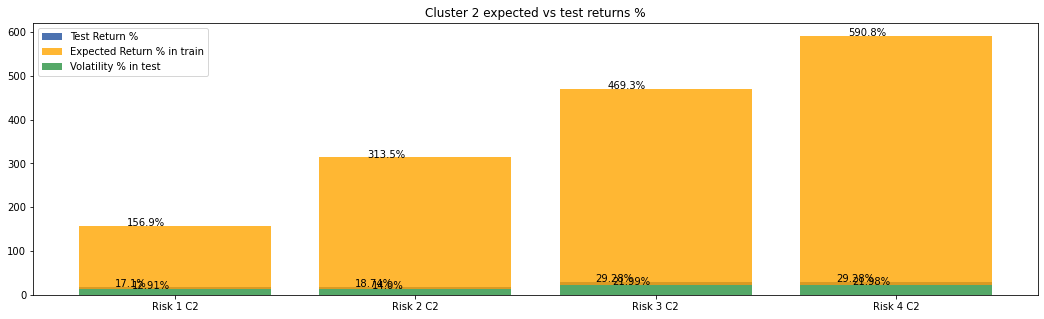

In [188]:
keep = [2,7,12,17]

labels = clustering_results_df["Method"].values[keep]
expected_return = clustering_results_df["Expected annual return %"].values[keep]

for i,j in enumerate(expected_return):
    expected_return[i] = float(j)

test_return = clustering_results_df["Test return %"].values[keep]

plt.bar(labels,test_return,label="Test Return %")

for index, value in enumerate(test_return):
    plt.text(index-0.25, value+0.15, str(value)+"%")

plt.bar(labels,expected_return,label="Expected Return % in train",color="orange",alpha=0.8)

for index, value in enumerate(expected_return):
    if value != 0 and index != 10:
        plt.text(index-0.2, value+0.2, str(value)+"%")
    elif value != 0 and index == 10:
        plt.text(index-0.2, value+3.2, str(value)+"%")

volatility = clustering_results_df["Volatility %"].values[keep]


plt.bar(labels,volatility,label="Volatility % in test")

for index, value in enumerate(volatility):
    if value != 0:
        plt.text(index-0.18, value+0.3, str(value)+"%")
    
plt.title("Cluster 2 expected vs test returns %")
plt.legend(loc='upper left')

pass